<a href="https://colab.research.google.com/github/RAGISHIVANAND/MACHINE-LEARNING/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary libraries











In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
digit = load_digits()

In [4]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

## Visualized the image

<Figure size 640x480 with 0 Axes>

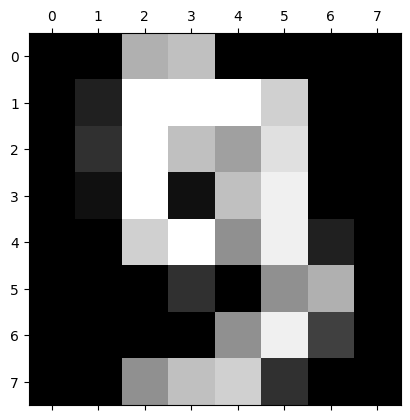

In [5]:
plt.gray()
plt.matshow(digit.images[9])

In [6]:
data = pd.DataFrame(digit.data)

In [7]:
digit.data.shape

(1797, 64)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Inserting the last column as target in dataset

In [9]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
data['target']=digit.target

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Splitting the data into x and y

In [12]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [13]:
x


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [14]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

# Splitting the data into training test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model = RandomForestClassifier(criterion='gini',max_features=10)

In [19]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=10)

In [20]:
model.score(x_test,y_test)

0.9733333333333334

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model=DecisionTreeClassifier(criterion='gini')

In [23]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
model.score(x_test,y_test)

0.8333333333333334

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
model=AdaBoostClassifier(learning_rate=0.1)

In [27]:
model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1)

In [28]:
model.score(x_test,y_test)

0.6422222222222222

In [29]:
model.score(x_train,y_train)

0.6933927245731255

# ***Using the gradient boosting classifier***

In [1]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
model = GradientBoostingClassifier()

In [44]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [45]:
model.score(x_test,y_test)

0.9577777777777777

In [46]:
model.score(x_train,y_train)

1.0

# HERE 1 MEANS SLIGHTLY OVERFITTING

In [47]:
model = GradientBoostingClassifier(n_estimators=60)

In [48]:
model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=60)

In [49]:
model.score(x_test,y_test)

0.9444444444444444

In [50]:
model.score(x_train,y_train)

1.0

HERE 1 MEANS SLIGHTLY OVERFITTING

In [51]:
model = GradientBoostingClassifier(n_estimators=20)

In [52]:
model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=20)

In [53]:
model.score(x_test,y_test)

0.9177777777777778

In [54]:
model.score(x_train,y_train)

0.9881217520415738

# **HERE 0.988121 MEANS 100% OVERFITTING **

In [55]:
model = GradientBoostingClassifier(n_estimators=15)

In [56]:
model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=15)

In [57]:
model.score(x_test,y_test)

0.9088888888888889

In [58]:
model.score(x_train,y_train)

0.977728285077951

# **HERE 0.977728285 MEANS 100% OVERFITTING **

# **BUT COMPARING TO ABOVE VALUE IT HAS REDUCED**

In [59]:
model = GradientBoostingClassifier(n_estimators=50)

In [60]:
model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50)

In [61]:
model.score(x_test,y_test)

0.94

In [62]:
model.score(x_train,y_train)

1.0

# **HERE 1 MEANS COMPLETELY FITTING THE DATA WHICH IS NOT AN IDEAL SOLUTION**

# SO IT IS ACTUALLY GIVING US 1


# **SO CONTROLLING THE NUMBER OF HYPERPARAMETERS  HERE(BELOW)
# **WILL CONTROL THE PERFORMANCE**

In [63]:
model = GradientBoostingClassifier(n_estimators=10)

In [64]:
model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=10)

In [65]:
model.score(x_test,y_test)

0.8822222222222222

In [66]:
model.score(x_train,y_train)

0.96362286562732

***# So since***
**# the number of observations(10 AND 5) are less here,**
# so you may not expect very close 
# accuracies for the training and test set,
# but it is comparable.
# So understand the use of the hyperparameter
# here. So number of estimators is something
# **which controls the model performance. **

In [67]:
model = GradientBoostingClassifier(n_estimators=5)

In [68]:
model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=5)

In [69]:
model.score(x_test,y_test)

0.8511111111111112

In [70]:
model.score(x_train,y_train)

0.9354120267260579

# ***CONSIDERING THE 100% OVERFITTING *** IS THE BEST PERFORMANCE TAKING n_estimators=20 OR 15

In [71]:
model = GradientBoostingClassifier(n_estimators=20)

In [72]:
model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=20)

In [74]:
model.score(x_test,y_test)

0.9155555555555556

In [75]:
model.score(x_train,y_train)

0.9881217520415738